In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization

# Suppress warnings
import warnings  # For managing warnings in the code
warnings.filterwarnings('ignore')  # Ignore all warnings

## display all columns of the dataframe
pd.options.display.max_columns=None
## display all rows of the dataframe
pd.options.display.max_rows=None

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier, ExtraTreesClassifier
import xgboost as xgb
from xgboost import XGBClassifier


from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

from scipy import stats
from scipy.stats import shapiro, levene, mannwhitneyu
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv('Data_without_Scaling_&_without_Outliers_Treatment.csv')
df.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V17,V18,V19,V20,V25,V28,V29,V30,V31,V32
0,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,12.75,FEMALE,HOUSEWIFE,OWNED,40.0,1,1,0,46500.0,0,0,0,TIER 1,0
1,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,13.65,MALE,SELF,RENT,47.0,1,1,0,28168.0,0,0,0,TIER 1,0
2,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,12.65,MALE,SELF,RENT,31.0,9,6,3,38900.0,31,31,16,TIER 1,0
3,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,9.50,FEMALE,SAL,RENT,24.0,1,1,0,42900.0,0,0,0,TIER 1,0
4,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,13.50,MALE,SAL,RENT,30.0,1,1,0,40900.0,0,0,0,TIER 1,0


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V17,V18,V19,V20,V25,V28,V29,V30,V31,V32
0,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,0.0,12.75,FEMALE,HOUSEWIFE,OWNED,40.0,1,1,0,46500.0,0,0,0,TIER 1,0
1,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,0.0,13.65,MALE,SELF,RENT,47.0,1,1,0,28168.0,0,0,0,TIER 1,0
2,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,0.0,12.65,MALE,SELF,RENT,31.0,9,6,3,38900.0,31,31,16,TIER 1,0
3,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,2.0,9.50,FEMALE,SAL,RENT,24.0,1,1,0,42900.0,0,0,0,TIER 1,0
4,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,0.0,13.50,MALE,SAL,RENT,30.0,1,1,0,40900.0,0,0,0,TIER 1,0


In [3]:
# Columns to be one-hot encoded
columns_to_encode = ['V10', 'V13', 'V14', 'V15', 'V31']


# One-Hot Encoding
df = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode, drop_first=True)

# Display the encoded data
print(df.columns)
print(df.shape)


Index(['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V11', 'V12', 'V17',
       'V18', 'V19', 'V20', 'V25', 'V28', 'V29', 'V30', 'V32', 'V10_MO',
       'V10_RETOP', 'V10_SC', 'V10_TL', 'V13_MALE', 'V14_PENS', 'V14_SAL',
       'V14_SELF', 'V14_STUDENT', 'V15_OWNED', 'V15_RENT', 'V31_TIER 2',
       'V31_TIER 3', 'V31_TIER 4'],
      dtype='object')
(85048, 33)
Index(['V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V11', 'V12', 'V17',
       'V18', 'V19', 'V20', 'V25', 'V28', 'V29', 'V30', 'V32', 'V10_MO',
       'V10_RETOP', 'V10_SC', 'V10_TL', 'V13_MALE', 'V14_PENS', 'V14_SAL',
       'V14_SELF', 'V14_STUDENT', 'V15_OWNED', 'V15_RENT', 'V31_TIER 2',
       'V31_TIER 3', 'V31_TIER 4'],
      dtype='object')
(85048, 33)


In [4]:
X = df.drop('V32', axis = 1)
y = df.V32

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 50)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(59533, 32) (25515, 32)
(59533,) (25515,)
(59533, 32) (25515, 32)
(59533,) (25515,)


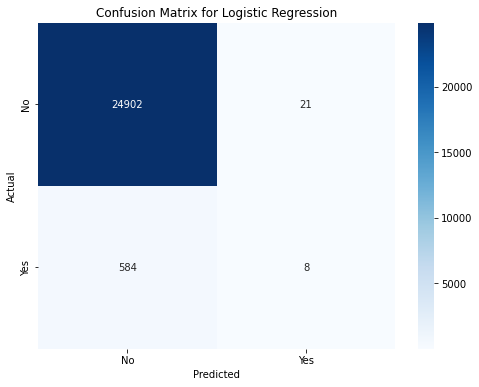

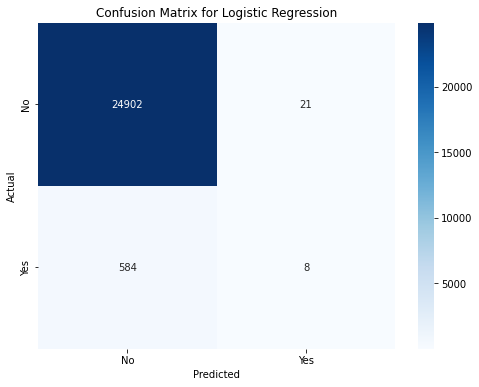

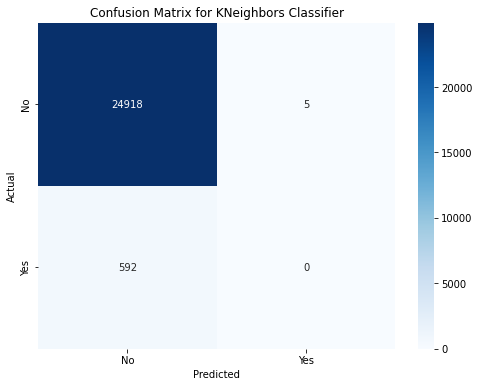

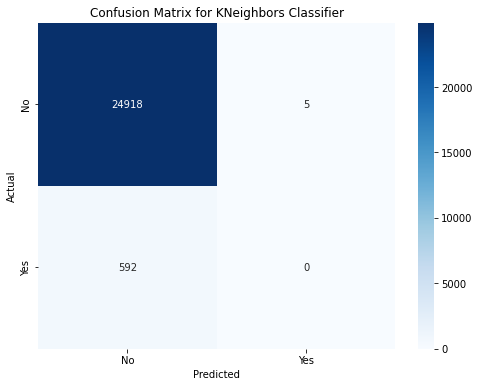

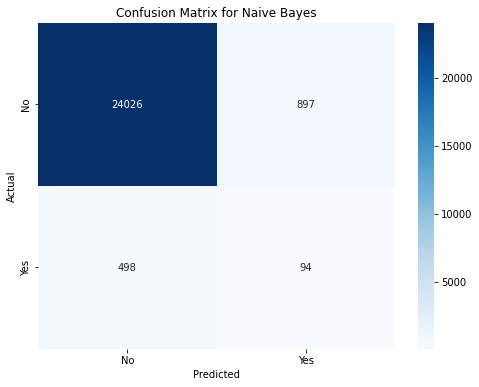

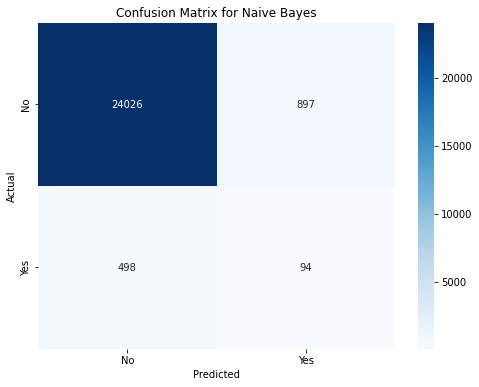

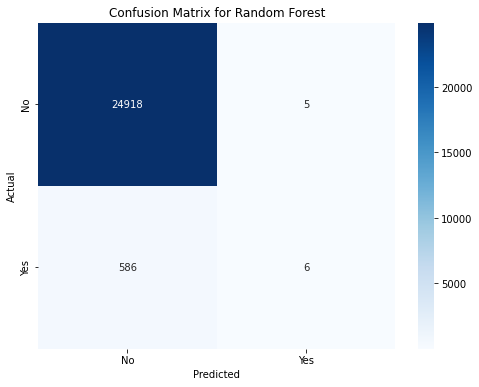

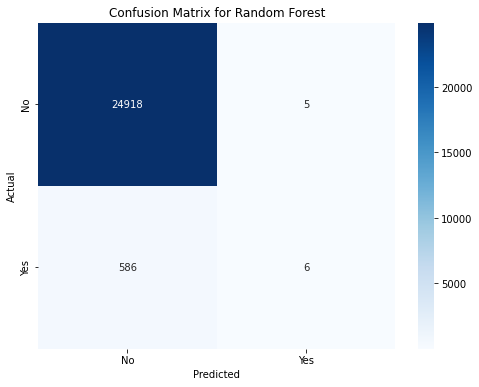

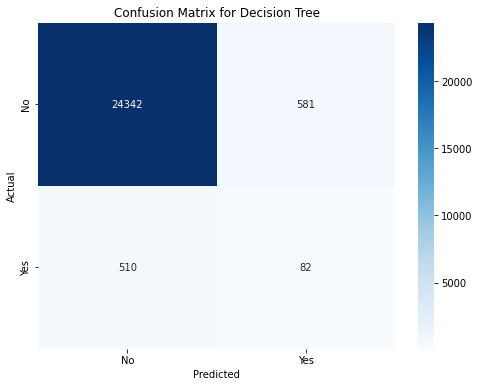

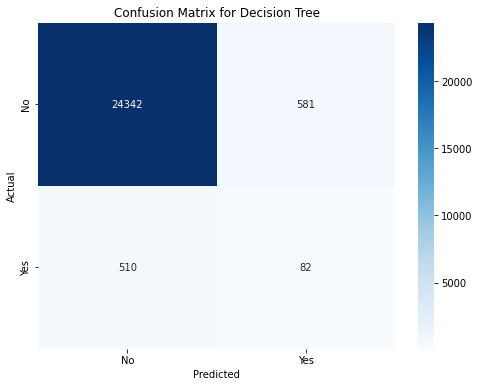

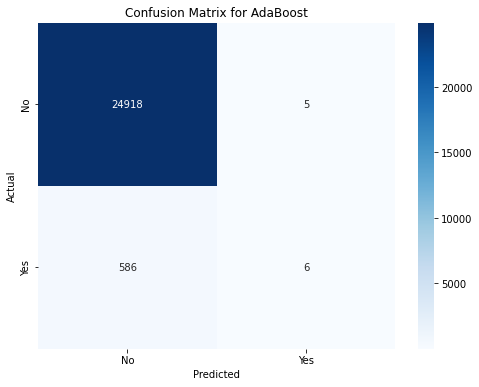

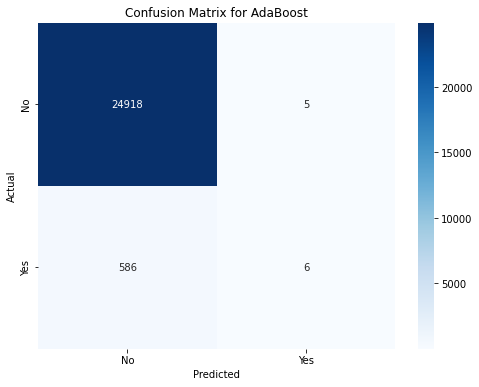

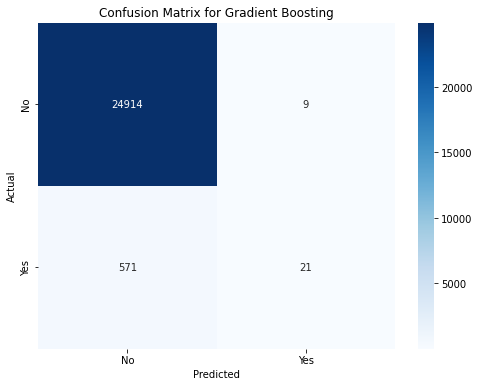

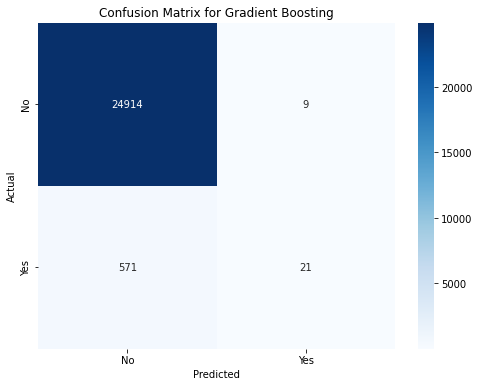

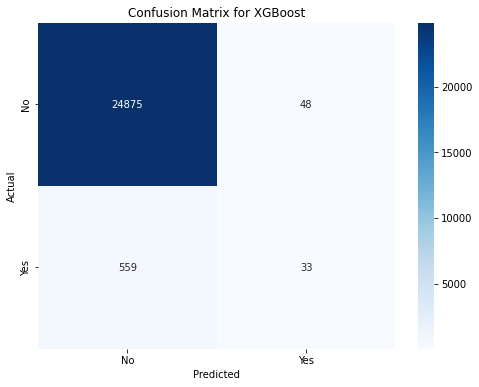

,Model,Recall,Precision,F1 Score,Accuracy
2,Naive Bayes,0.16,0.09,0.12,0.95
4,Decision Tree,0.14,0.12,0.13,0.96
7,XGBoost,0.06,0.41,0.10,0.98
6,Gradient Boosting,0.04,0.70,0.07,0.98
0,Logistic Regression,0.01,0.28,0.03,0.98
3,Random Forest,0.01,0.55,0.02,0.98
5,AdaBoost,0.01,0.55,0.02,0.98
1,KNeighbors Classifier,0.00,0.00,0.00,0.98


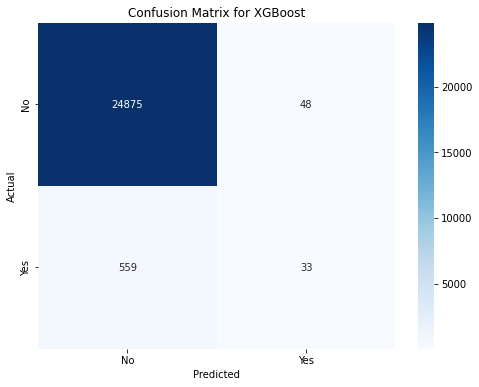

,Model,Recall,Precision,F1 Score,Accuracy
2,Naive Bayes,0.16,0.09,0.12,0.95
4,Decision Tree,0.14,0.12,0.13,0.96
7,XGBoost,0.06,0.41,0.10,0.98
6,Gradient Boosting,0.04,0.70,0.07,0.98
0,Logistic Regression,0.01,0.28,0.03,0.98
3,Random Forest,0.01,0.55,0.02,0.98
5,AdaBoost,0.01,0.55,0.02,0.98
1,KNeighbors Classifier,0.00,0.00,0.00,0.98


In [5]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNeighbors Classifier': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# List to store scores
scores = []

# Evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append scores to list
    scores.append({
        'Model': model_name,
        'Recall': round(recall, 2),
        'Precision': round(precision, 2),
        'F1 Score': round(f1, 2),
        'Accuracy': round(accuracy, 2)
    })
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Convert scores list to DataFrame
scores_df = pd.DataFrame(scores)

# Display the scores DataFrame
scores_df.sort_values(by = 'Recall', ascending = False)


# <font color = 'green'>Hyper Parameter Tuning

Hyperparameter tuning for Logistic Regression...
Hyperparameter tuning for Logistic Regression...


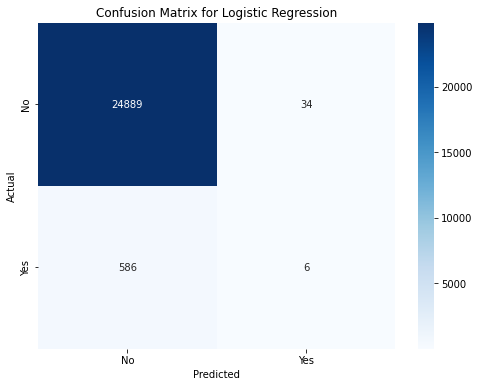

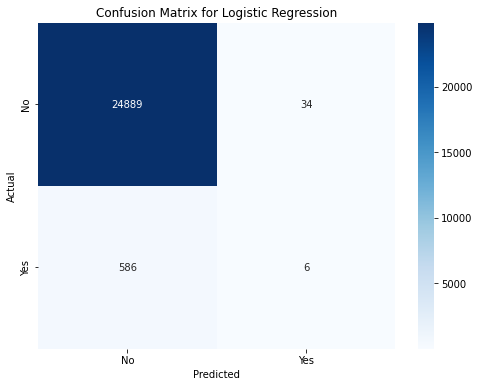

Hyperparameter tuning for KNeighbors Classifier...
Hyperparameter tuning for KNeighbors Classifier...


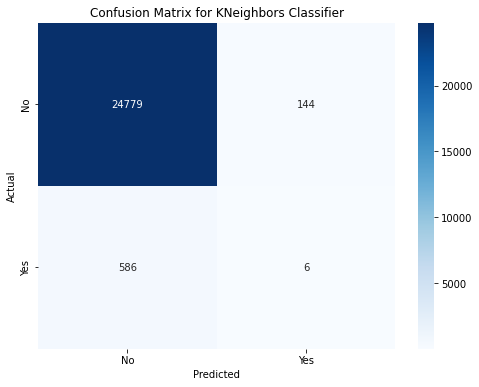

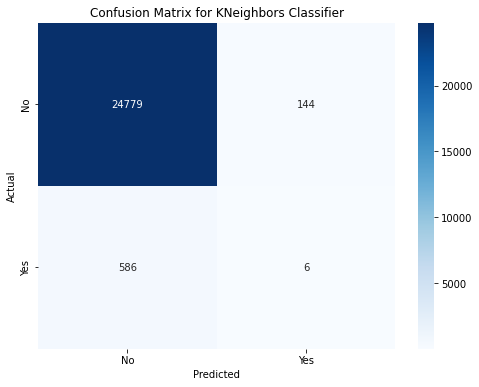

Hyperparameter tuning for Naive Bayes...
Hyperparameter tuning for Naive Bayes...


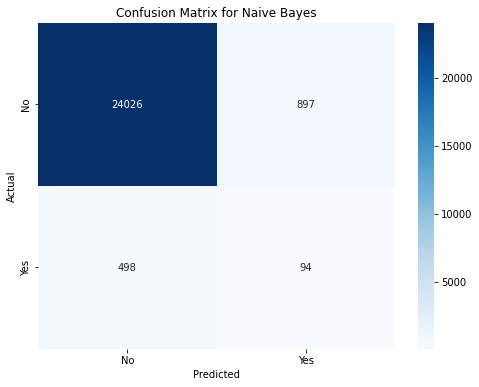

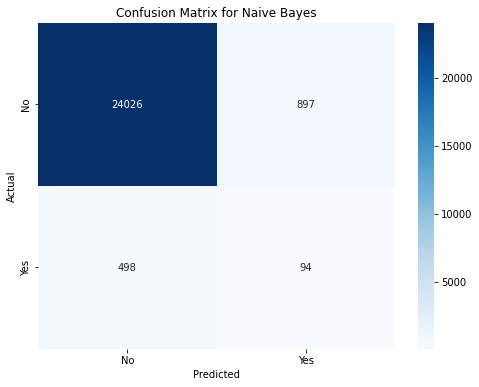

Hyperparameter tuning for Random Forest...
Hyperparameter tuning for Random Forest...


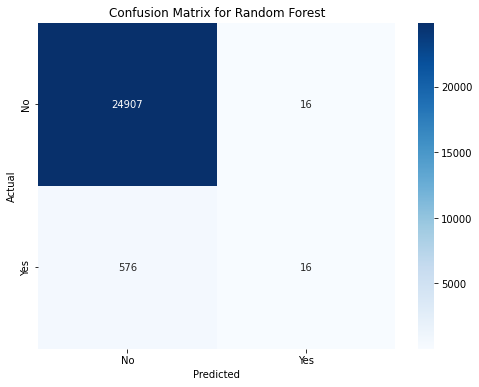

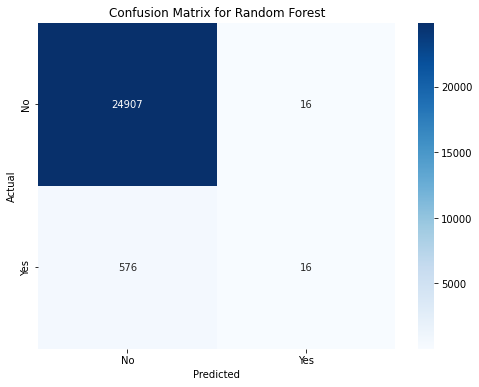

Hyperparameter tuning for Decision Tree...
Hyperparameter tuning for Decision Tree...


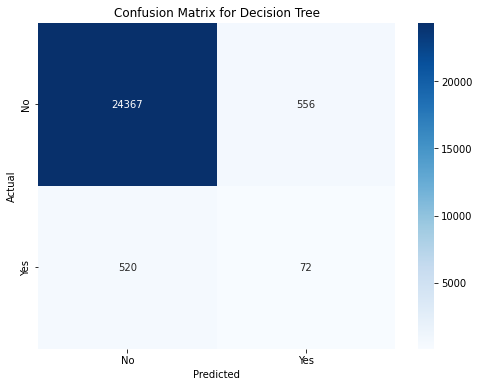

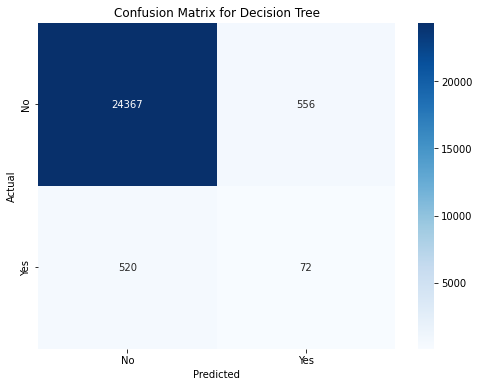

Hyperparameter tuning for AdaBoost...
Hyperparameter tuning for AdaBoost...


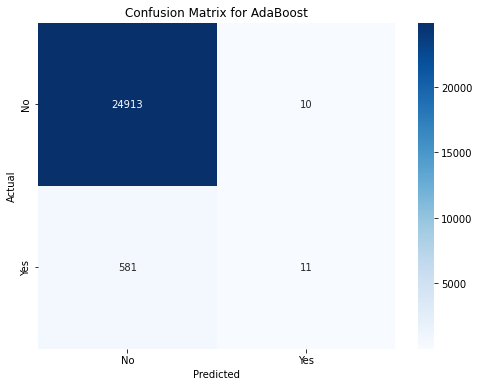

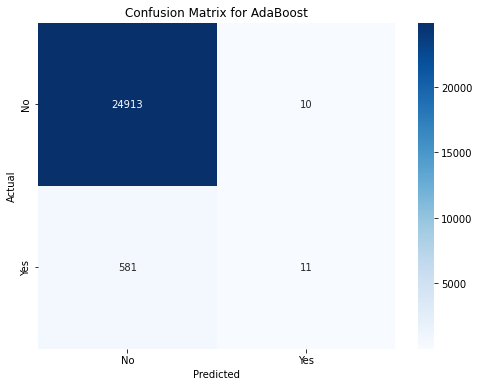

Hyperparameter tuning for XGBoost...
Hyperparameter tuning for XGBoost...


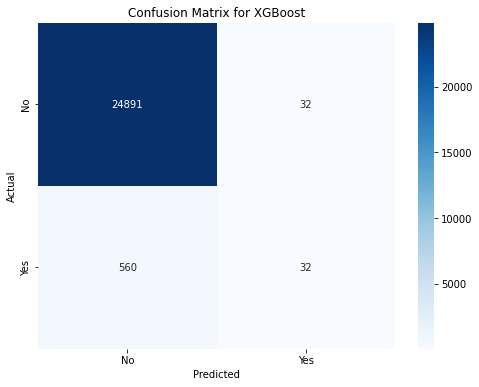

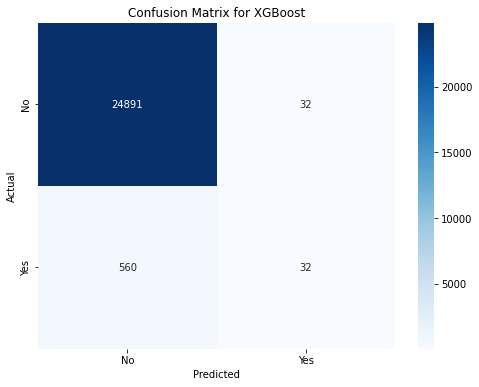

Hyperparameter tuning for Gradient Boosting...
Hyperparameter tuning for Gradient Boosting...


KeyboardInterrupt: 

KeyboardInterrupt: 

In [6]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

# Define hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    'KNeighbors Classifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'Naive Bayes': {},  # GaussianNB doesn't have hyperparameters to tune
    'Random Forest': {
        'n_estimators': [10, 50, 100],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Decision Tree': {
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'KNeighbors Classifier': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# List to store scores
scores = []

# Evaluate each model with hyperparameter tuning
for model_name, model in models.items():
    print(f"Hyperparameter tuning for {model_name}...")
    
    # Get hyperparameter grid for the current model
    param_grid = param_grids.get(model_name, {})
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grid, scoring='recall', cv=5)
    grid_search.fit(X_train, y_train)
    
    # Best model
    best_model = grid_search.best_estimator_
    
    # Predict on test set
    y_pred = best_model.predict(X_test)
    
    # Calculate metrics
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append scores to list
    scores.append({
        'Model': model_name,
        'Best Hyperparameters': grid_search.best_params_,
        'Recall': round(recall, 2),
        'Precision': round(precision, 2),
        'F1 Score': round(f1, 2),
        'Accuracy': round(accuracy, 2)
    })
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Convert scores list to DataFrame
scores_df = pd.DataFrame(scores)

# Display the scores DataFrame
scores_df.sort_values(by = 'Recall', ascending = False)
